이번 노트에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다.

다음 데이터셋은 미국 시애틀 King County 지역의 2014년 5월 ~ 2015년 5월 주택 판매 가격 데이터입니다.
   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)

이 데이터를 사용해 다음 과제를 마크다운과 코드를 활용하여 진행해 주세요.

## **Part 1. Linear Regression**

### **1-1. 데이터 준비하기**

- 데이터셋을 불러오세요.
- 특성들과 타겟(price) 간의 상관계수를 계산하고, 상관계수가 가장 높은 특성을 찾으세요.
- 상관계수가 가장 높은 특성과 타겟을 scatter plot으로 시각화 하세요.
  - x축은 특성, y축은 타겟을 나타내야 합니다.

##### **Q1. 타겟과 상관계수가 가장 높은 특성의 이름을 적어 주세요.**

In [1]:
# 데이터셋을 불러옵니다.

import pandas as pd

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
## Q1. 타겟과 상관계수가 가장 높은 특성의 이름을 적어 주세요
corr = df.corr()['price']
corr_abs_sorted = corr.abs().sort_values(ascending=False)
corr_sorted_real = corr[corr_abs_sorted.index]

print("Q1. 타겟과 상관계수 (절대값 기준 정렬, 실제 값 표시):")
print(corr_sorted_real)
print("\n타겟과 상관계수가 가장 높은 특성:", corr_sorted_real.index[1])

Q1. 타겟과 상관계수 (절대값 기준 정렬, 실제 값 표시):
price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode         -0.053203
condition        0.036362
long             0.021626
id              -0.016762
Name: price, dtype: float64

타겟과 상관계수가 가장 높은 특성: sqft_living


C:\Users\owenc\AppData\Local\Temp\ipykernel_25872\3596633541.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()['price']


### **1-2. 기준모델**

- `sqft_living`과 `price`의 scatter plot을 그리고, 평균 기준모델을 시각화 하세요.

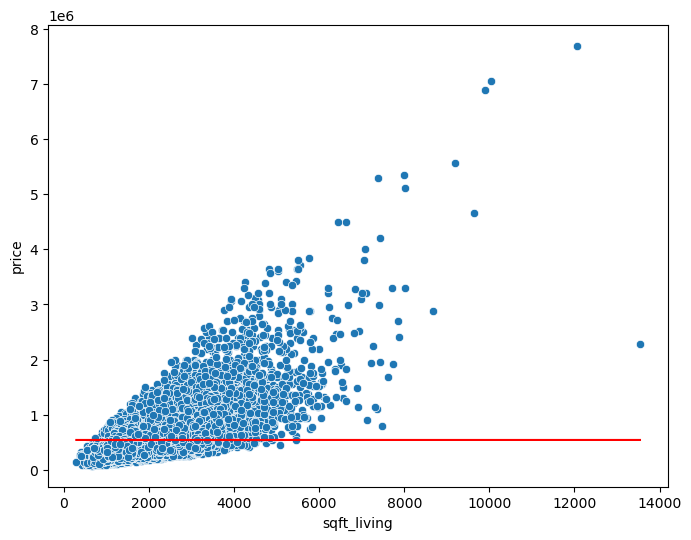

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_base = df['price'].mean()

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['sqft_living'], y = df['price'])
sns.lineplot(x=df['sqft_living'], y=y_pred_base, color='red')
plt.show()

##### **Q2. 기준모델에서 사용한 평균값을 적어 주세요. (소수점 이하 반올림)**

In [4]:
print("Q2. 기준모델에서 사용한 평균값:", round(y_pred_base))

Q2. 기준모델에서 사용한 평균값: 540088


### **1-3. Simple Linear Regression**

- Scikit-Learn 라이브러리를 사용하여 단순선형회귀 모델을 만드세요.
  - 특성은 `sqft_living`이고, 타겟은 `price`입니다.
- 모델 학습 후, 특성 `sqft_living`에 대한 타겟 `price`의 예측값을 구하세요.

##### **Q3. 단순선형회귀 모델이 예측한 결과에서 index가 0인 값을 적어 주세요. (소수점 이하 반올림)**

In [5]:
from sklearn.linear_model import LinearRegression

simple_X = df[['sqft_living']]
y = df['price']
simple_ols = LinearRegression()
simple_ols.fit(simple_X, y)
y_pred_simple = simple_ols.predict(simple_X)
print("Q3. 단순선형회귀 모델이 예측한 결과 (index 0):", round(y_pred_simple[0]))

Q3. 단순선형회귀 모델이 예측한 결과 (index 0): 287555


### **1-4. Multiple Linear Regression**

- Scikit-Learn 라이브러리를 사용하여 다중선형회귀 모델을 만드세요.
  - 특성은 `sqft_living`, `bathrooms`이고, 타겟은 `price`입니다.
- 모델 학습 후, 두 특성 `sqft_living`, `bathrooms`에 대한 타겟 `price`의 예측값을 구하세요.

##### **Q4. 다중선형회귀 모델이 예측한 결과에서 index가 0인 값을 적어 주세요. (소수점 이하 반올림)**

In [6]:
multi_X = df[['sqft_living', 'bathrooms']]
y = df['price']
multi_ols = LinearRegression()
multi_ols.fit(multi_X, y)
y_pred_multi = multi_ols.predict(multi_X)
print("Q4. 다중선형회귀 모델이 예측한 결과 (index 0):", round(y_pred_multi[0]))

Q4. 다중선형회귀 모델이 예측한 결과 (index 0): 290371


## **Part 2. 평가지표**

**Part 1**에서 구한 기준모델, 단순선형회귀, 다중선형회귀의 성능을 평가해 봅니다.
- 각 모델의 mse, rmse, mae, $R^2$ 값을 구하세요.
- 위에서 구한 평가지표를 비교해 보고, 어느 모델의 성능이 가장 좋을지 생각해 보세요.

##### **Q5. 다중선형회귀 모델의 $R^2$을 반올림하여 소수점 첫째 자리까지 구한 값을 적어 주세요.**

In [7]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred_multi)
print("Q5. 다중선형회귀 모델의 R^2:", round(r2, 1))

Q5. 다중선형회귀 모델의 R^2: 0.5


##### **Q6. 단순선형회귀, 다중선형회귀 모델의 성능이 기준모델보다 나아졌나요?**

In [8]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def eval_models(y_pred, y_real=y) :
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    return mse, rmse, mae, r2



base_mse, base_rmse, base_mae, base_r2 = eval_models([y_pred_base]*len(df))
simple_mse, simple_rmse, simple_mae, simple_r2 = eval_models(y_pred_simple)
multiple_mse, multiple_rmse, multiple_mae, multiple_r2 = eval_models(y_pred_multi)

comparison_metrics = pd.DataFrame(index=['mse', 'rmse', 'mae', 'r2'], columns=['Base','Simple', 'Multiple', ])
comparison_metrics['Base'] = [base_mse, base_rmse, base_mae, base_r2 ]
comparison_metrics['Simple'] = [simple_mse, simple_rmse, simple_mae, simple_r2]
comparison_metrics['Multiple'] = [multiple_mse, multiple_rmse, multiple_mae, multiple_r2]
comparison_metrics

,Base,Simple,Multiple
mse,1.347761e+11,6.835129e+10,6.834448e+10
rmse,3.671187e+05,2.614408e+05,2.614278e+05
mae,2.339417e+05,1.736883e+05,1.736970e+05
r2,0.000000e+00,4.928532e-01,4.929037e-01


## **Part 3. 모델 해석**

`LinearRegression` 객체의 `coef_`와 `intercept_` 속성을 사용하여 모델 식을 구합니다.
- 단순선형회귀식을 구하세요.
- 다중선형회귀식을 구하세요.

##### **Q7. 단순선형회귀 모델의 coefficient를 적어 주세요. (소수점 이하 반올림)**

In [9]:
print('coefficient: ', round(simple_ols.coef_[0]))

coefficient:  281


##### **Q8. 다중선형회귀 모델의 `sqft_living`의 coefficient를 적어 주세요. (소수점 이하 반올림)**

In [10]:
print('coefficient: ', round(multi_ols.coef_[0]))

coefficient:  284


## **Part 4. Linear Regression - Advanced**

### **4-1. Discussion**

단순선형회귀 모델을 만들기 위해 전제되어야 하는 조건들에 대해 설명해 보세요.

* 선형성(Linearity): 독립변수와 종속변수 사이에 선형 관계가 있어야 합니다. 산점도를 그려 대략적으로 직선 형태인지 확인할 수 있습니다.
* 독립성(Independence): 관측치들은 서로 독립적이어야 합니다. 즉, 한 데이터 포인트가 다른 포인트에 영향을 주면 안 됩니다.
* 등분산성(Homoscedasticity): 오차의 분산이 모든 독립변수 값에 대해 일정해야 합니다. 잔차 플롯을 통해 확인할 수 있습니다.
* 정규성(Normality): 오차가 정규 분포를 따라야 합니다. Q-Q 플롯으로 확인 가능합니다.
* 이상치 부재(Absence of Outliers): 극단적인 이상치가 없어야 합니다. 이는 모델의 정확도에 큰 영향을 줄 수 있습니다.
* 다중공선성 부재(Absence of Multicollinearity): 단순선형회귀에서는 독립변수가 하나이므로 크게 문제되지 않지만, 독립변수들 간에 강한 상관관계가 없어야 합니다.

아래 질문들에 대해서는 Kaggle의 예시 코드들을 참조해보세요!

https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/code
https://www.kaggle.com/code/durjoychandrapaul/pytorch-multiple-linear-regression-in-house-price

### **4-2. Simple Linear Regression**

- Scikit-Learn 라이브러리를 사용하여 단순선형회귀 모델을 만드세요.
  - **기본 과제**에서 사용한 특성 외에 다른 특성을 사용합니다.
  - 타겟은 `price` 입니다.
- 모델 학습 후, 사용한 특성에 대한 타겟 `price`의 예측값을 구하세요.

### **4-3. Multiple Linear Regression**

- Scikit-Learn 라이브러리를 사용하여 다중선형회귀 모델을 만드세요.
  - 3가지 이상의 특성을 사용합니다.
  - 타겟은 `price`입니다.
- 모델 학습 후, 사용한 특성들에 대한 타겟 `price`의 예측값을 구하세요.

### **4-4. 평가지표**

**4-2**, **4-3**에서 구한 단순선형회귀, 다중선형회귀의 성능을 평가해 봅니다.
- 각 모델의 mse, rmse, mae, $R^2$ 값을 구하세요.
- 위에서 구한 평가지표와 **Part 1**에서 구한 평가지표 스코어에 대하여, 해당 결과를 통해 얻을 수 있는 인사이트는 어떤 것이 있는지 설명해 보세요.